# Homework 8

#### Fill out the following information (each category below should be on a separate line): 
Name:   
Date Submitted: 

#### Use the following data set to answer the questions for your homework:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

url = "http://pbpython.com/extras/sample-salesv2.csv"

sales = pd.read_csv(url)

In [3]:
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### Subset the dataframe to contain only the name, category, quantity and unit price columns

In [4]:
sales[['name', 'category','quantity','unit price']]
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


#### Subset the dataframe to contain only shirt sales

In [5]:
shirt_df = sales[['name', 'category', 'quantity', 'unit price']]
shirt_df = shirt_df[shirt_df['category']== 'Shirt']
shirt_df.head()

,name,category,quantity,unit price
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16
3,Waters-Walker,Shirt,5,82.68
4,Waelchi-Fahey,Shirt,18,99.64
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98


#### Calculate the total cost per shirt sale

In [6]:
renamedshirt_df=shirt_df.rename(columns = {'unit price':'unit_price'})
renamedshirt_df['shirt_sales'] = renamedshirt_df.quantity * renamedshirt_df.unit_price
renamedshirt_df.head()

,name,category,quantity,unit_price,shirt_sales
2,"Kerluke, Reilly and Bechtelar",Shirt,12,24.16,289.92
3,Waters-Walker,Shirt,5,82.68,413.40
4,Waelchi-Fahey,Shirt,18,99.64,1793.52
5,"Kerluke, Reilly and Bechtelar",Shirt,17,52.82,897.94
9,"Kerluke, Reilly and Bechtelar",Shirt,12,26.98,323.76


#### Group the shirt sales by company name

In [7]:
shirts_by_company = renamedshirt_df.groupby('name', as_index=False).sum()
shirts_by_company.head()

,name,quantity,unit_price,shirt_sales
0,Berge LLC,166,1226.54,9670.24
1,Carroll PLC,257,1098.93,13717.61
2,Cole-Eichmann,236,1226.75,14528.01
3,"Davis, Kshlerin and Reilly",161,828.51,7533.03
4,"Ernser, Cruickshank and Lind",262,1500.25,16944.19


#### Graph the top 10 shirt sales

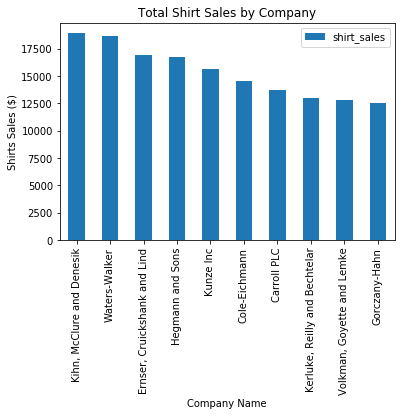

In [8]:
top_sellers = shirts_by_company.sort_values(by='shirt_sales', ascending=False).head(10)
shirt_plot = top_sellers.plot(kind="bar", 
                             title="Total Shirt Sales by Company",
                             x="name",
                             y="shirt_sales")
shirt_plot.set_xlabel("Company Name")
shirt_plot.set_ylabel("Shirts Sales ($)")

### To turn in your homework:
- Save this notebook as a PDF (or html if you can't get PDF output working)
- Upload the file to GitHub
- Provide the URL to this file on your GitHub repo in canvas 